# UV file basics

Raw data from HERA consists of `*.uv` files, which are a "streaming" file format common in radio astronomy. Behind the scenes, the file contains a cross-correlated visibility for each antenna pair at a specific time and frequency. There are several libraries for interacting with UV files, such as `aipy` and `pyuvdata`. We will spend most of this tutorial using the functionality built into `capo` to learn more about the raw data.

## Basic file information
`uv` "files" are actually directories that contain the raw data (`visdata`), largely in binary, and metadata (`flags`, `header`, `history`, and `vartable`). Libraries such as `capo` use this information to parse the files into something that we humans can understand.

# Activity 1: Visualize Raw Data
Let's start by seeing what the raw data looks like, to understand what we're working with. The basic "unit" that we'll plot is a "waterfall" plot. This is a two-dimensional plot of the visibility (the cross-correlated signal between a pair of antennas) as a function of time and frequency. Let's learn how to extract this information.

## Reading in the File
The first step is to read in the file using our library (`aipy`, in this case). We make use of the `plot_uv.py` script. This script takes as an argument the name of the `.uv` file we want to plot. It also needs to know what pair of antennas we'd like to plot, which is done with the `-a` flag. Let's look at the waterfall for antennas 1 and 4. To do this, run the following command in a terminal. You'll have to run it in the same directory where the `.uv` file we downloaded from the Librarian is located.

```
$ plot_uv.py zen.2456680.29213.xx.uv -a 1_4 --cmap=viridis
```
Notice how there are several frequency channels that are bright yellow for all times. These are channels with heavy RFI contamination. We'll talk about how to remove this noise in a little bit.

# Activity 2: Writing Scripts
In the previous activity, we plotted a waterfall using the `plot_uv.py` script. This implicitly handled the complicated business of processing the file and reading in the data. We're going to see how to manipulate the data, and plot the same data we did with the `plot_uv.py` script.

## Sample Script
Here we have a few lines that show roughly what students should come up with:

[(1, 4)]
['xx']


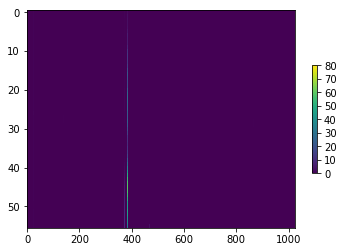

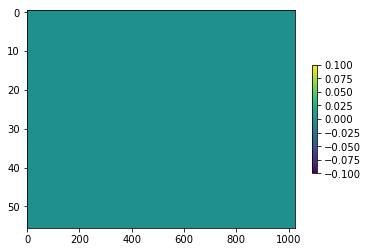

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import capo
import aipy

# read in data file
# define filename
uvfile = '/Users/plaplant/Documents/school/penn/champ/zen.2456680.29213.xx.uv'

# use capo to read in a specific baseline (antenna pair) and polarization
# the return values are t (lsts), d (a dictionary of data), and f (flags)
t, d, f = capo.miriad.read_files([uvfile],antstr='1_4',polstr='xx')

# let's understand the data dictionary a little better
print(d.keys())
print(d[(1,4)].keys())

# d is actually a dictionary of dictionaries indexed first by baseline
#   and then by polarization
# since in our capo call we only included one baseline and polarization,
#   that's all that we have

# bearing in mind that visibilities are, in general, complex, let's plot
#   the real and imaginary values
data = np.abs(d[(1,4)]['xx'])
dreal = data.real
dmax = dreal.max()
dmin = dreal.min()
plt.imshow(dreal,aspect='auto',vmax=dmax,
           vmin=dmin,interpolation='nearest')
plt.colorbar(shrink=0.5)
plt.show()

dimag = data.imag
dmax = dimag.max()
dmin = dimag.min()
plt.imshow(dimag,aspect='auto',vmax=dmax,
          vmin=dmin,interpolation='nearest')
plt.colorbar(shrink=0.5)
plt.show()

# TODO: needs a little more fiddling to look like the plot_uv.py result